In [2]:
!nvidia-smi

Mon Mar 11 17:21:32 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [4]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.4/78.2 GB disk)


In [5]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e .

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [6]:
from ultralytics import YOLO

from IPython.display import display, Image

In [2]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="zsTnzHO4kZVxi1EOZZD1")
project = rf.workspace("lab1-fzwg3").project("transport-rhkah")
version = project.version(8)
dataset = version.download("yolov8")


mkdir: cannot create directory ‘{HOME}/datasets’: No such file or directory
[Errno 2] No such file or directory: '{HOME}/datasets'
/content
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to transport-8 in yolov8:: 100%|██████████| 2012/2012 [00:00<00:00, 5449.72it/s]


mkdir: cannot create directory ‘{HOME}/datasets’: No such file or directory
[Errno 2] No such file or directory: '{HOME}/datasets'
/content
loading Roboflow workspace...
loading Roboflow project...


## Custom Training

### Цикл обучения 1

In [3]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8n.pt data={dataset.location}/data.yaml epochs=40 imgsz=1000 plots=True

[Errno 2] No such file or directory: '{HOME}'
/content
100% 6.23M/6.23M [00:00<00:00, 79.1MB/s]
New https://pypi.org/project/ultralytics/8.1.26 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/transport-8/data.yaml, epochs=40, patience=50, batch=16, imgsz=1000, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sh

In [4]:
!ls runs/detect/train/

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1710177778.4886505f4c25.1555.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1560.jpg  val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch1561.jpg  val_batch2_pred.jpg
labels.jpg					    train_batch1562.jpg  weights
P_curve.png					    train_batch1.jpg
PR_curve.png					    train_batch2.jpg


[Errno 2] No such file or directory: '{HOME}'
/content


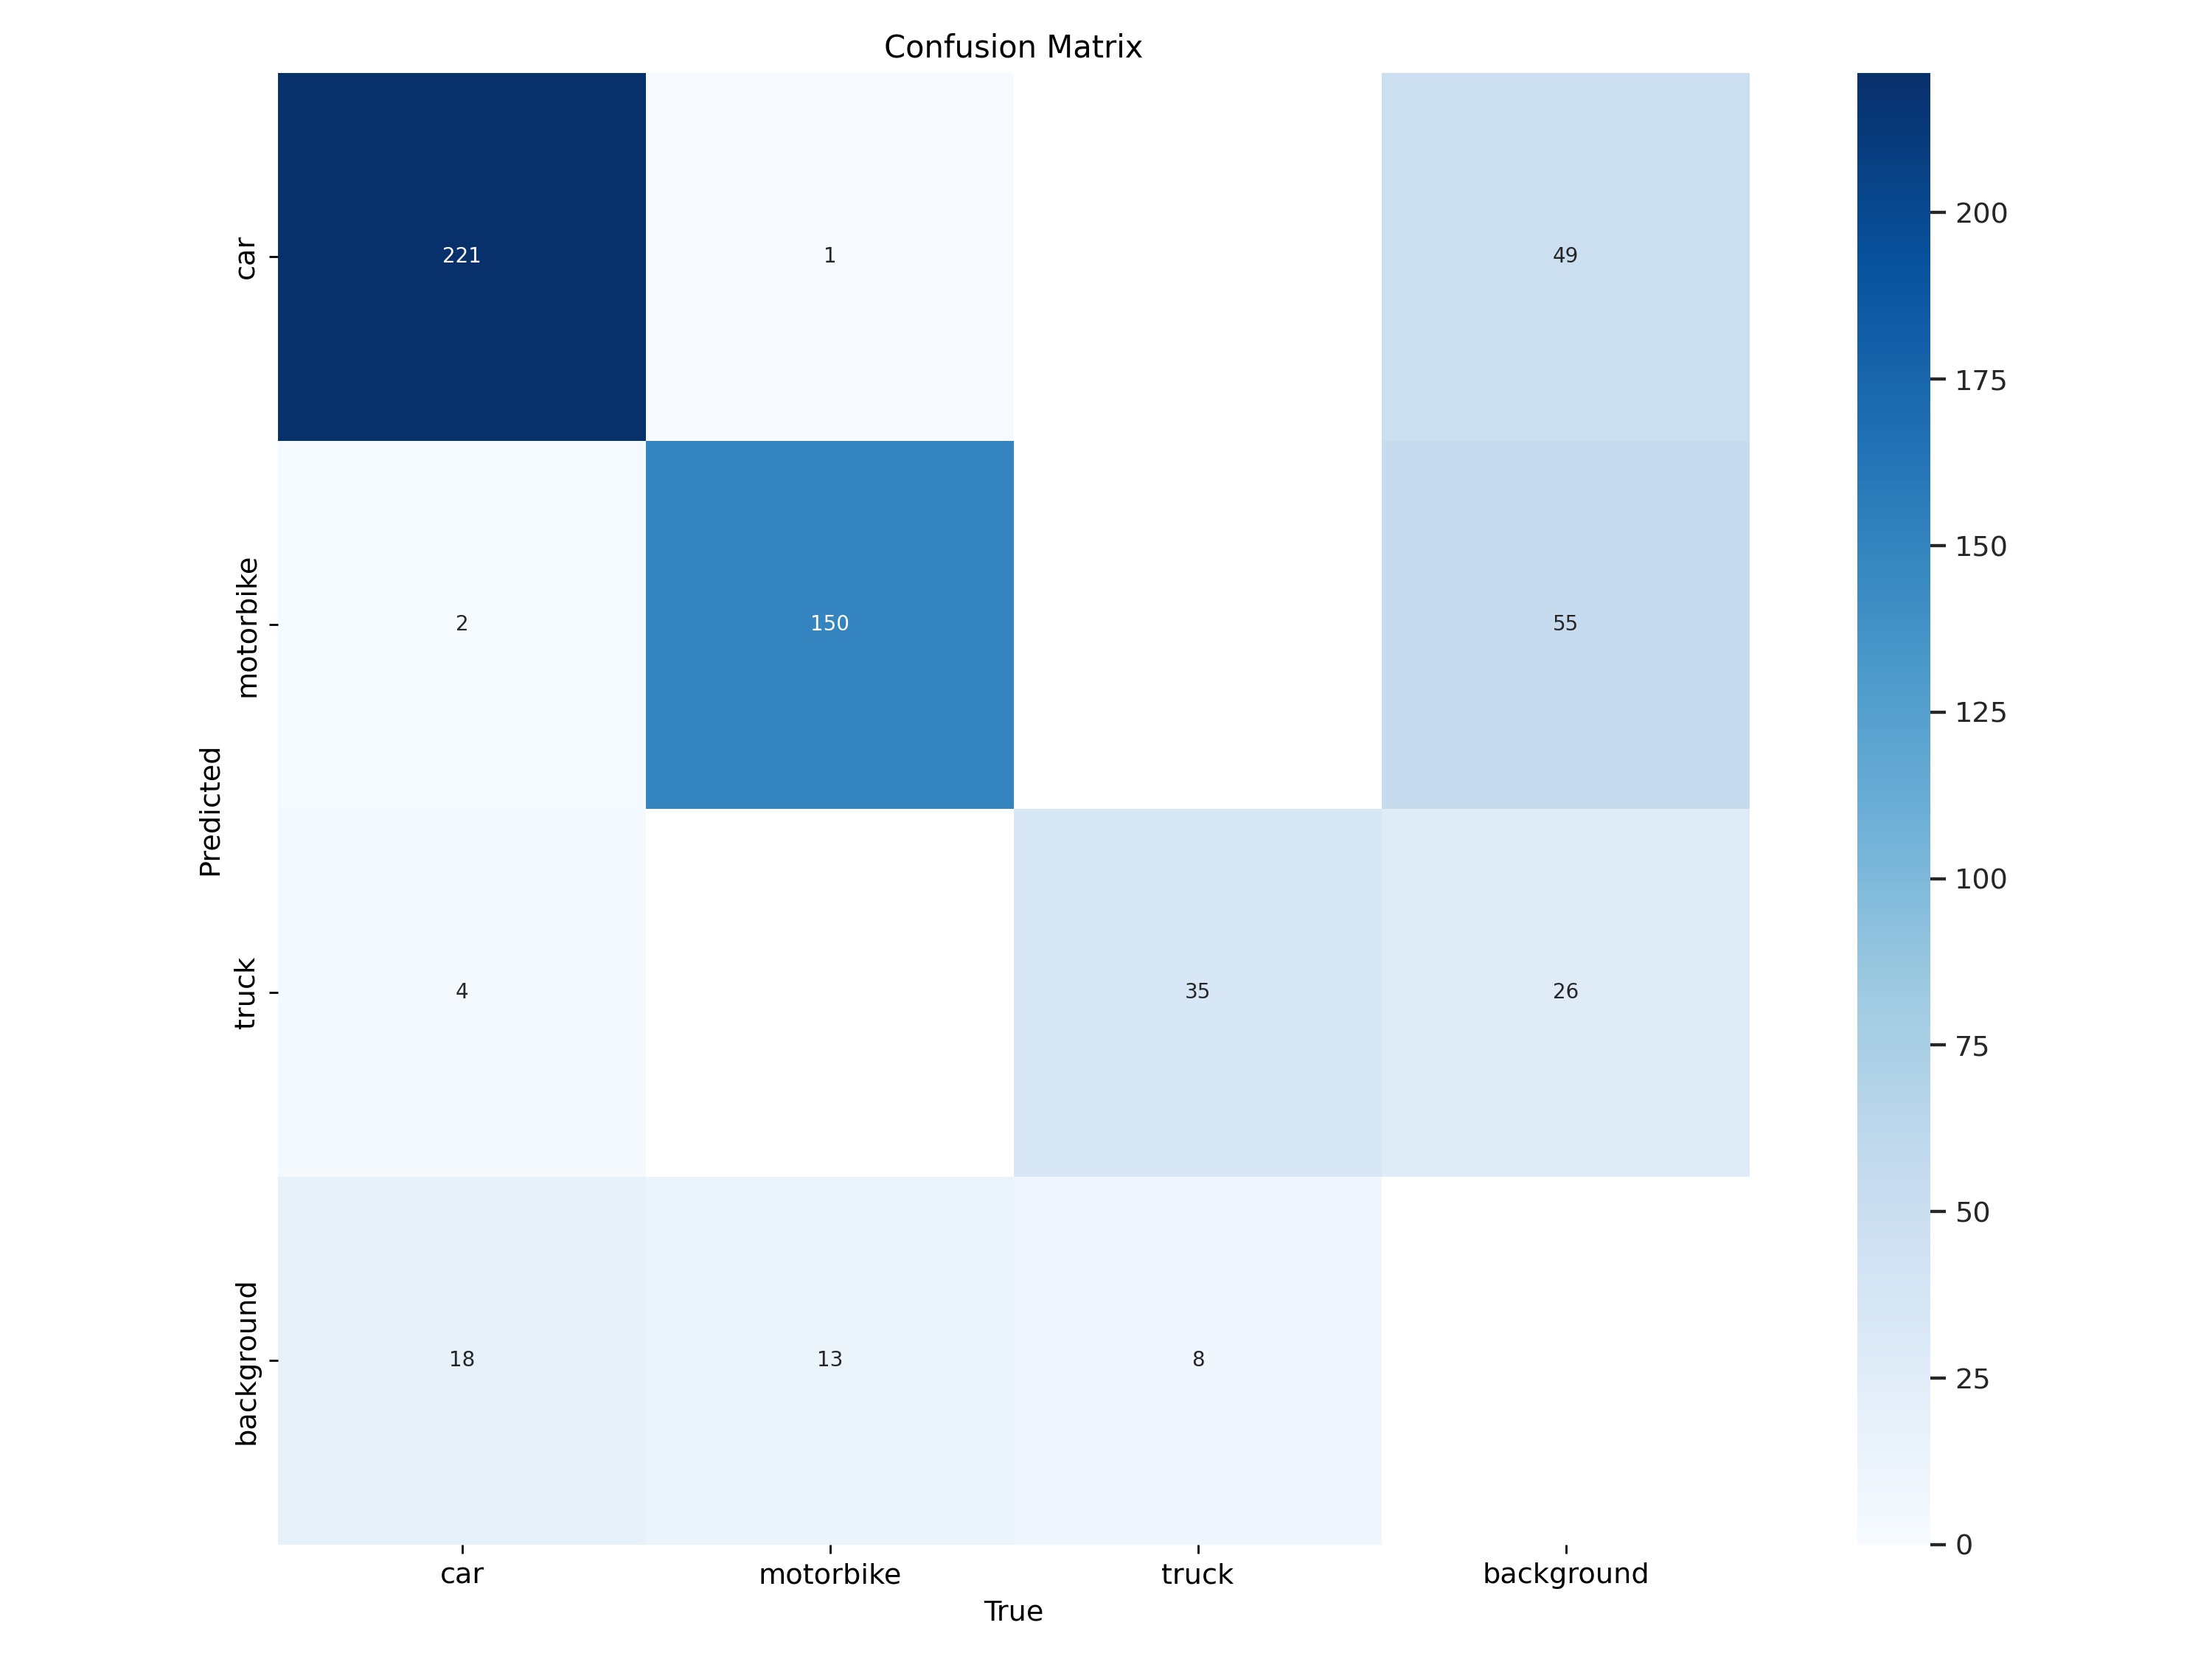

In [7]:
%cd {HOME}
Image(filename=f'runs/detect/train/confusion_matrix.png', width=600)

[Errno 2] No such file or directory: '{HOME}'
/content


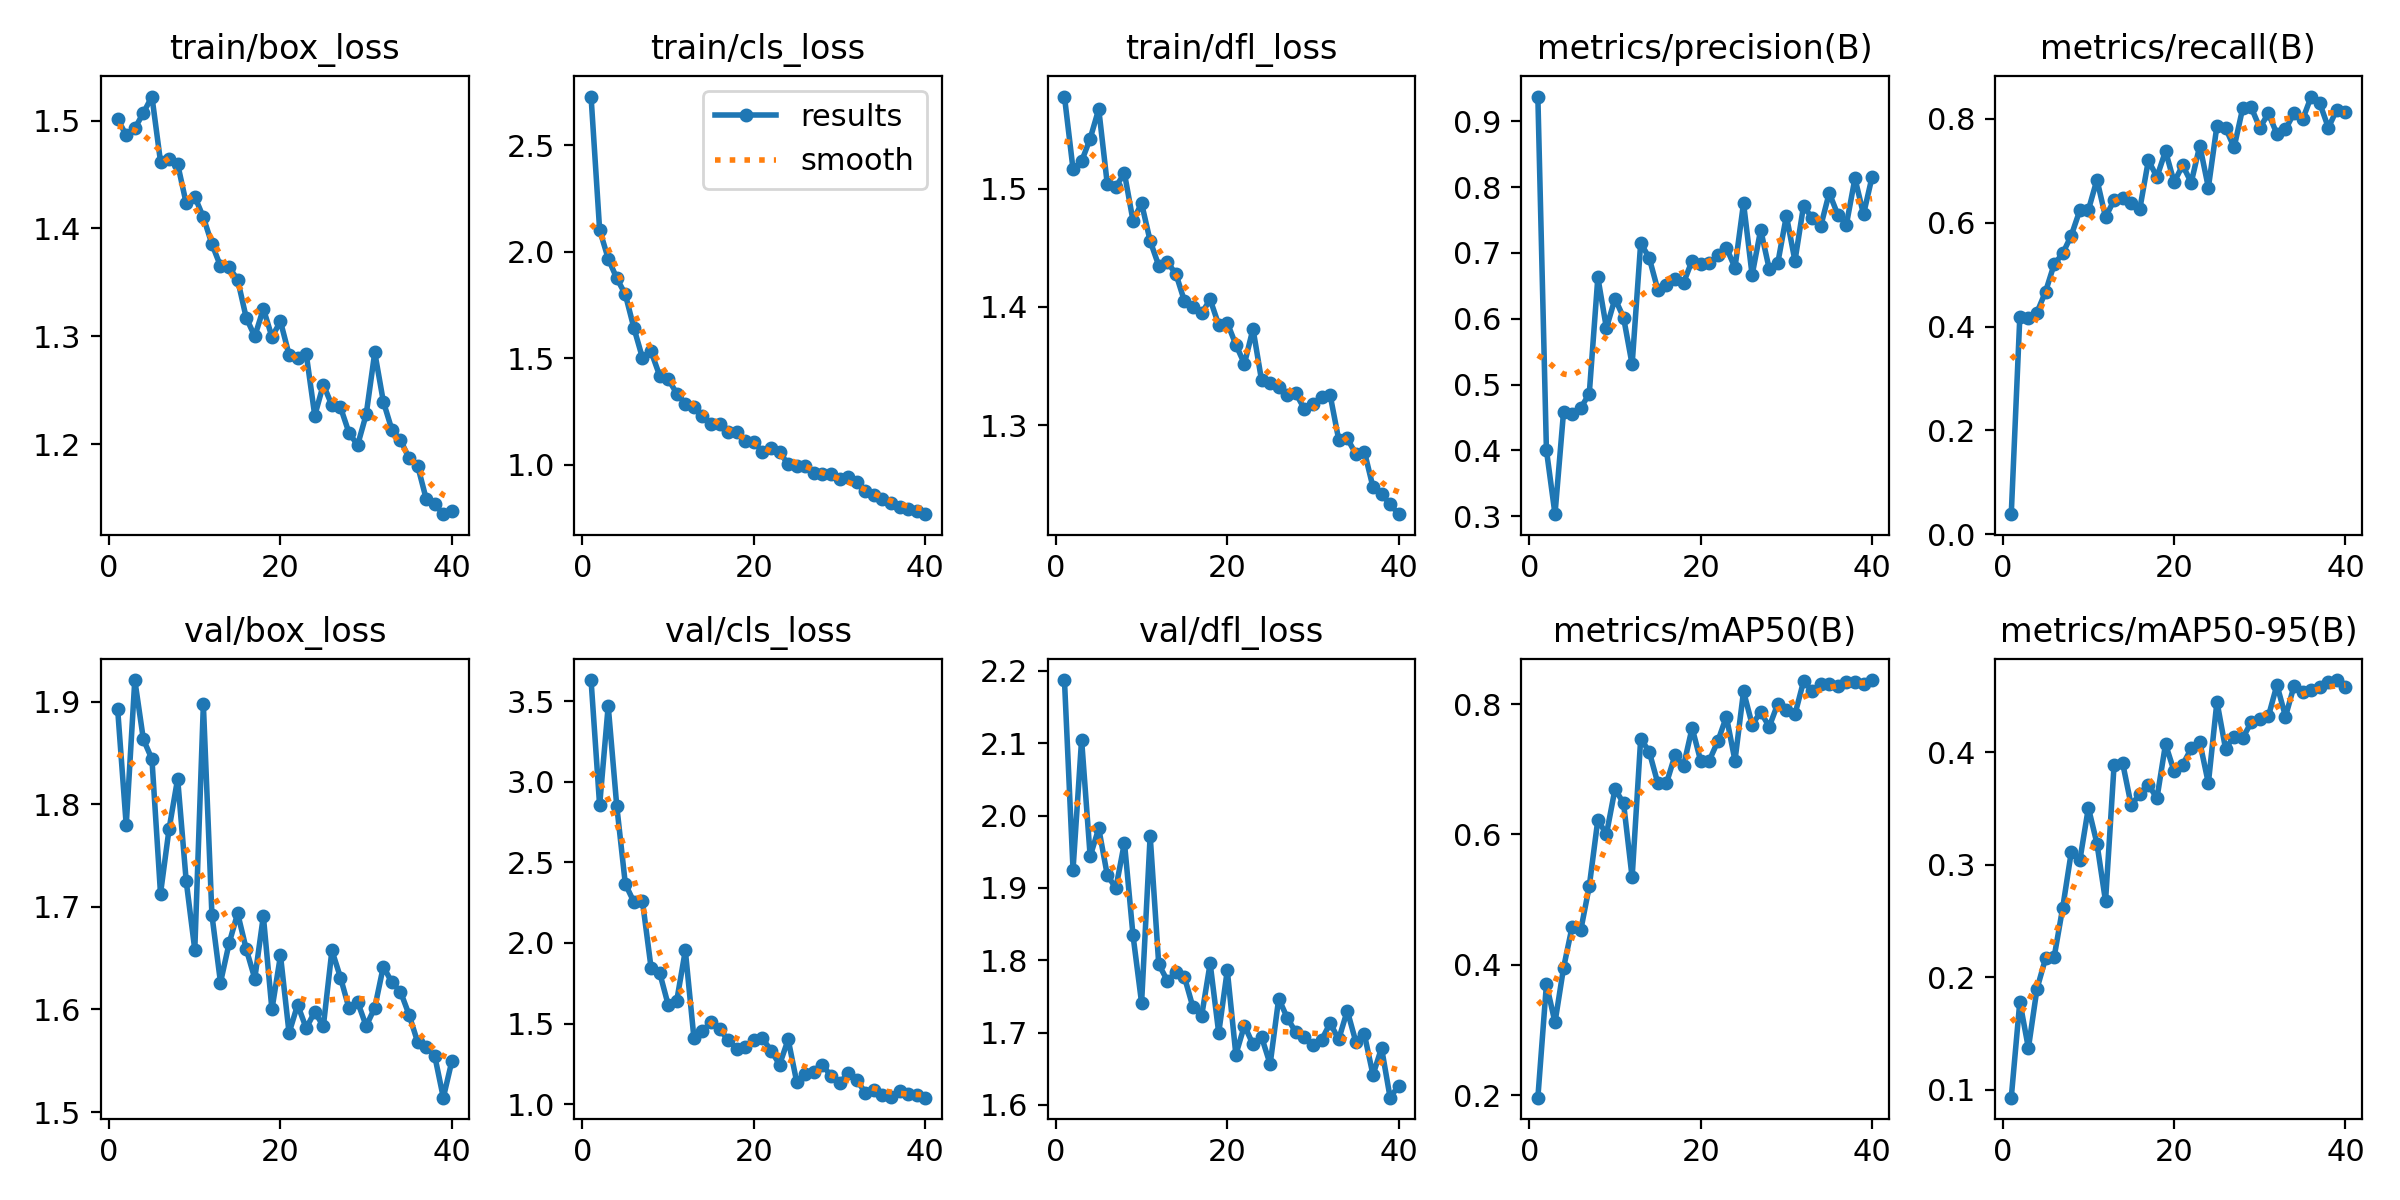

In [8]:
%cd {HOME}
Image(filename=f'runs/detect/train/results.png', width=800)

[Errno 2] No such file or directory: '{HOME}'
/content


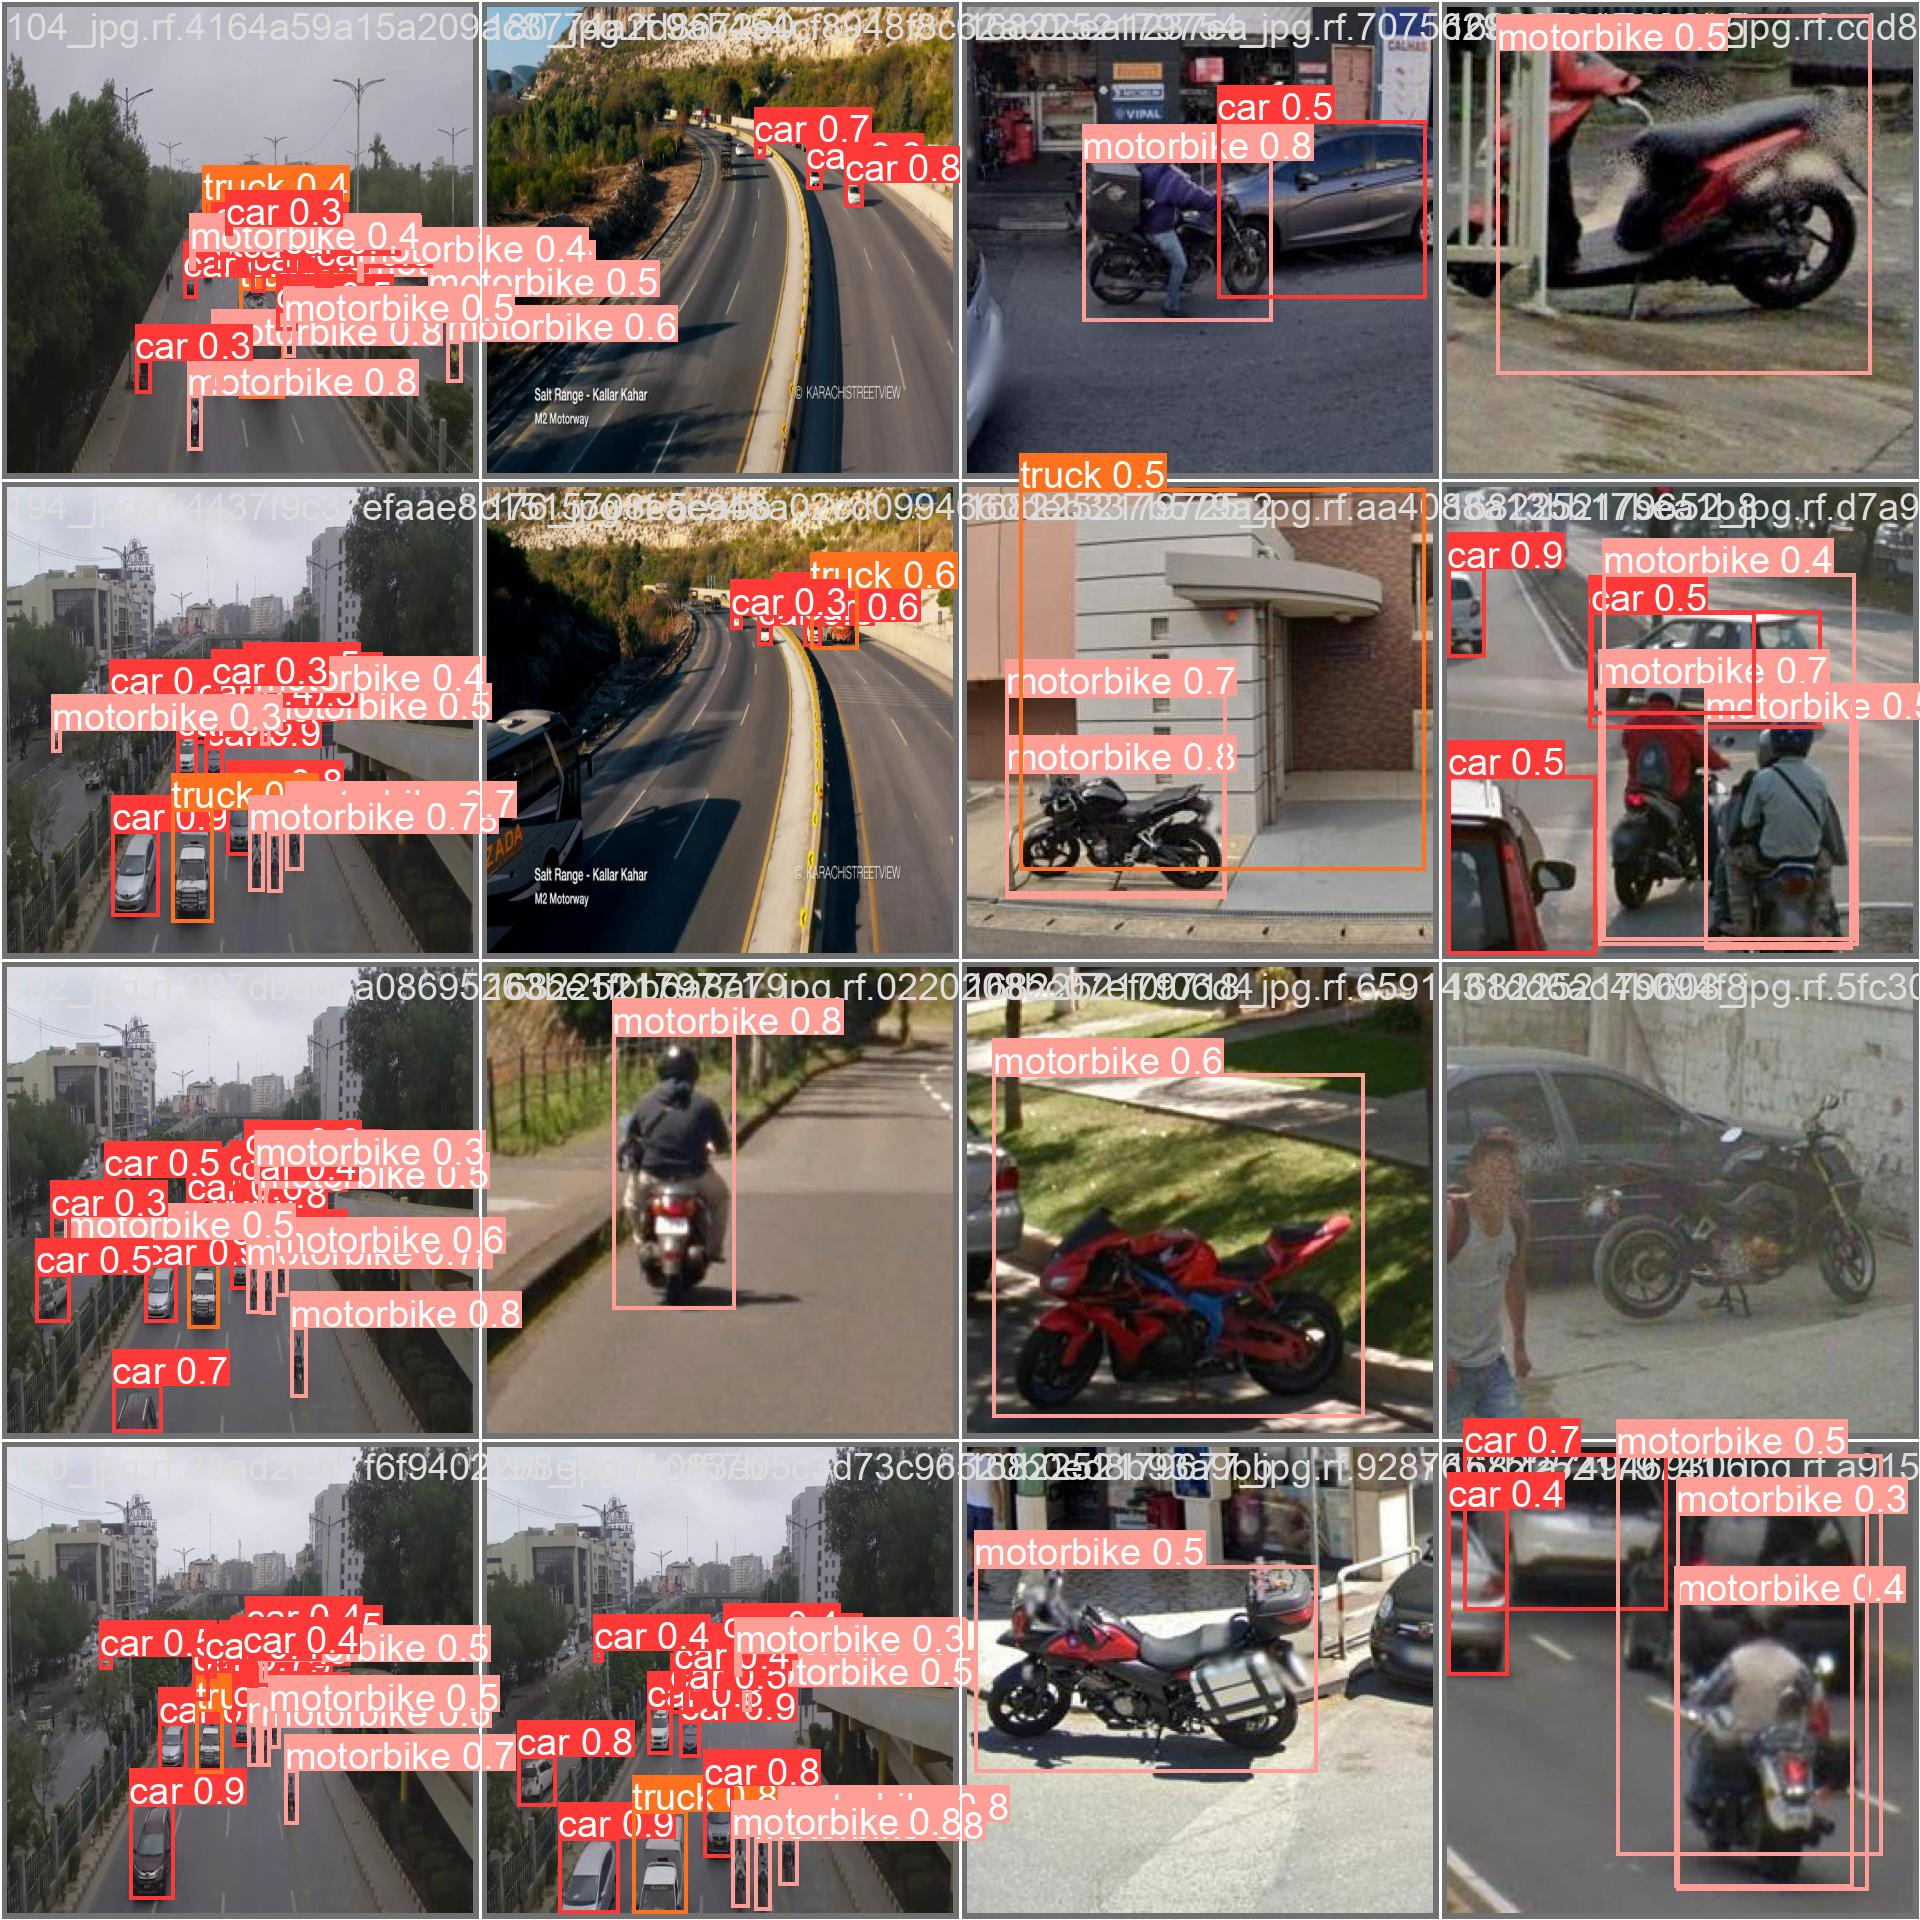

In [9]:
%cd {HOME}
Image(filename=f'runs/detect/train/val_batch0_pred.jpg', width=600)

Валидация

In [10]:
%cd {HOME}

!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

[Errno 2] No such file or directory: '{HOME}'
/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/transport-8/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100% 73/73 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 5/5 [00:10<00:00,  2.14s/it]
                   all         73        452      0.758      0.818      0.831      0.464
                   car         73        245      0.863      0.833      0.918      0.512
             motorbike         73        164      0.782      0.855       0.89      0.408
                 truck         73         43      0.628      0.767      0.686      0.472
Speed: 16.0ms preprocess, 33.7ms inference, 0.0ms loss, 19.6ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [11]:
%cd {HOME}
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

[Errno 2] No such file or directory: '{HOME}'
/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/98 /content/transport-8/test/images/077006000_1466184933-kepala_kuning_jpg.rf.48cba5b00fec070f8fa4278d5377a7d3.jpg: 1024x1024 1 car, 1 motorbike, 1 truck, 16.5ms
image 2/98 /content/transport-8/test/images/0ed5b30d578ecfa7a65f-1296x954_jpg.rf.30ab1ba9bba8e3962b61b2ee7a94f2c7.jpg: 1024x1024 1 truck, 13.4ms
image 3/98 /content/transport-8/test/images/106_jpg.rf.c591817fa6f72793862ecffbf2fa3b7f.jpg: 1024x1024 3 cars, 3 trucks, 13.4ms
image 4/98 /content/transport-8/test/images/17828_5789AHS01_17-1_jpg.rf.624134cb1d9bc251bc0753cc3824f01c.jpg: 1024x1024 2 cars, 1 truck, 13.3ms
image 5/98 /content/transport-8/test/images/1997-mitsubishi-fuso-fh211-20-ft-box_jpg.rf.f40587c838ab927f90d76bf54efefc8c.jpg: 1024x1024 1 truck, 13.

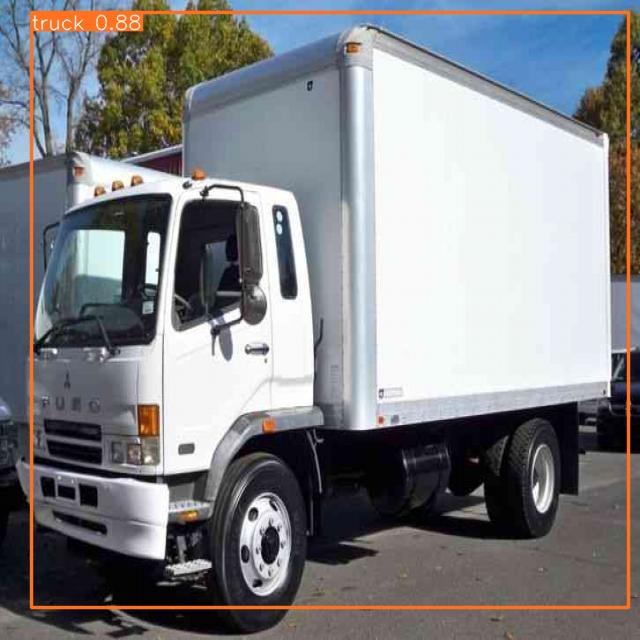

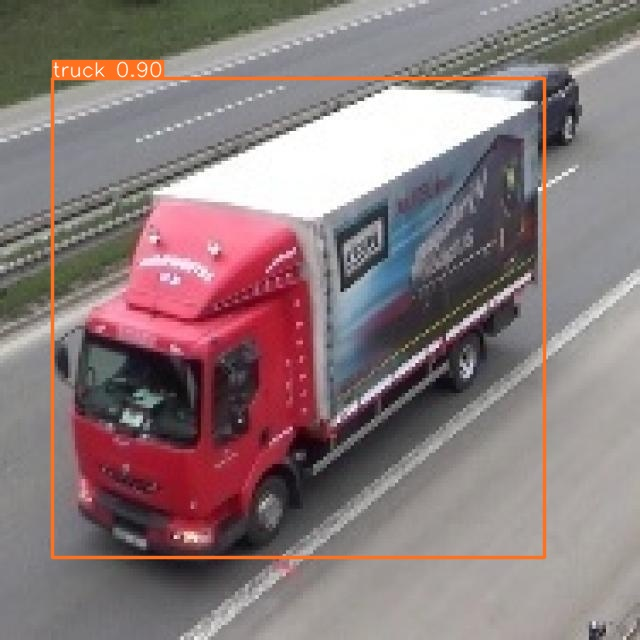

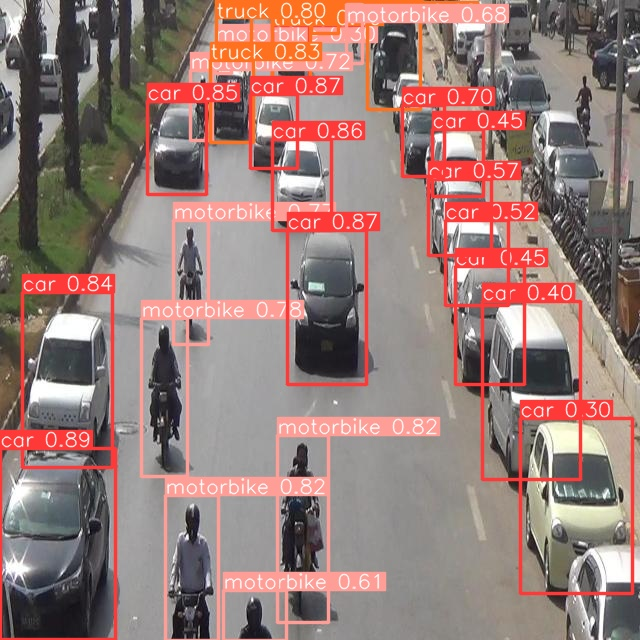

In [26]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'runs/detect/predict2/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

### Обучение 2

In [13]:
%cd {HOME}

!yolo task=detect mode=train model=runs/detect/train/weights/best.pt data={dataset.location}/data.yaml epochs=60 imgsz=1000 plots=True

[Errno 2] No such file or directory: '{HOME}'
/content
New https://pypi.org/project/ultralytics/8.1.26 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=runs/detect/train/weights/best.pt, data=/content/transport-8/data.yaml, epochs=60, patience=50, batch=16, imgsz=1000, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_

In [16]:
!ls runs/detect/train3/

args.yaml					     R_curve.png	  val_batch0_labels.jpg
confusion_matrix_normalized.png			     results.csv	  val_batch0_pred.jpg
confusion_matrix.png				     results.png	  val_batch1_labels.jpg
events.out.tfevents.1710180694.4886505f4c25.13518.0  train_batch0.jpg	  val_batch1_pred.jpg
F1_curve.png					     train_batch1.jpg	  val_batch2_labels.jpg
labels_correlogram.jpg				     train_batch2600.jpg  val_batch2_pred.jpg
labels.jpg					     train_batch2601.jpg  weights
P_curve.png					     train_batch2602.jpg
PR_curve.png					     train_batch2.jpg


[Errno 2] No such file or directory: '{HOME}'
/content


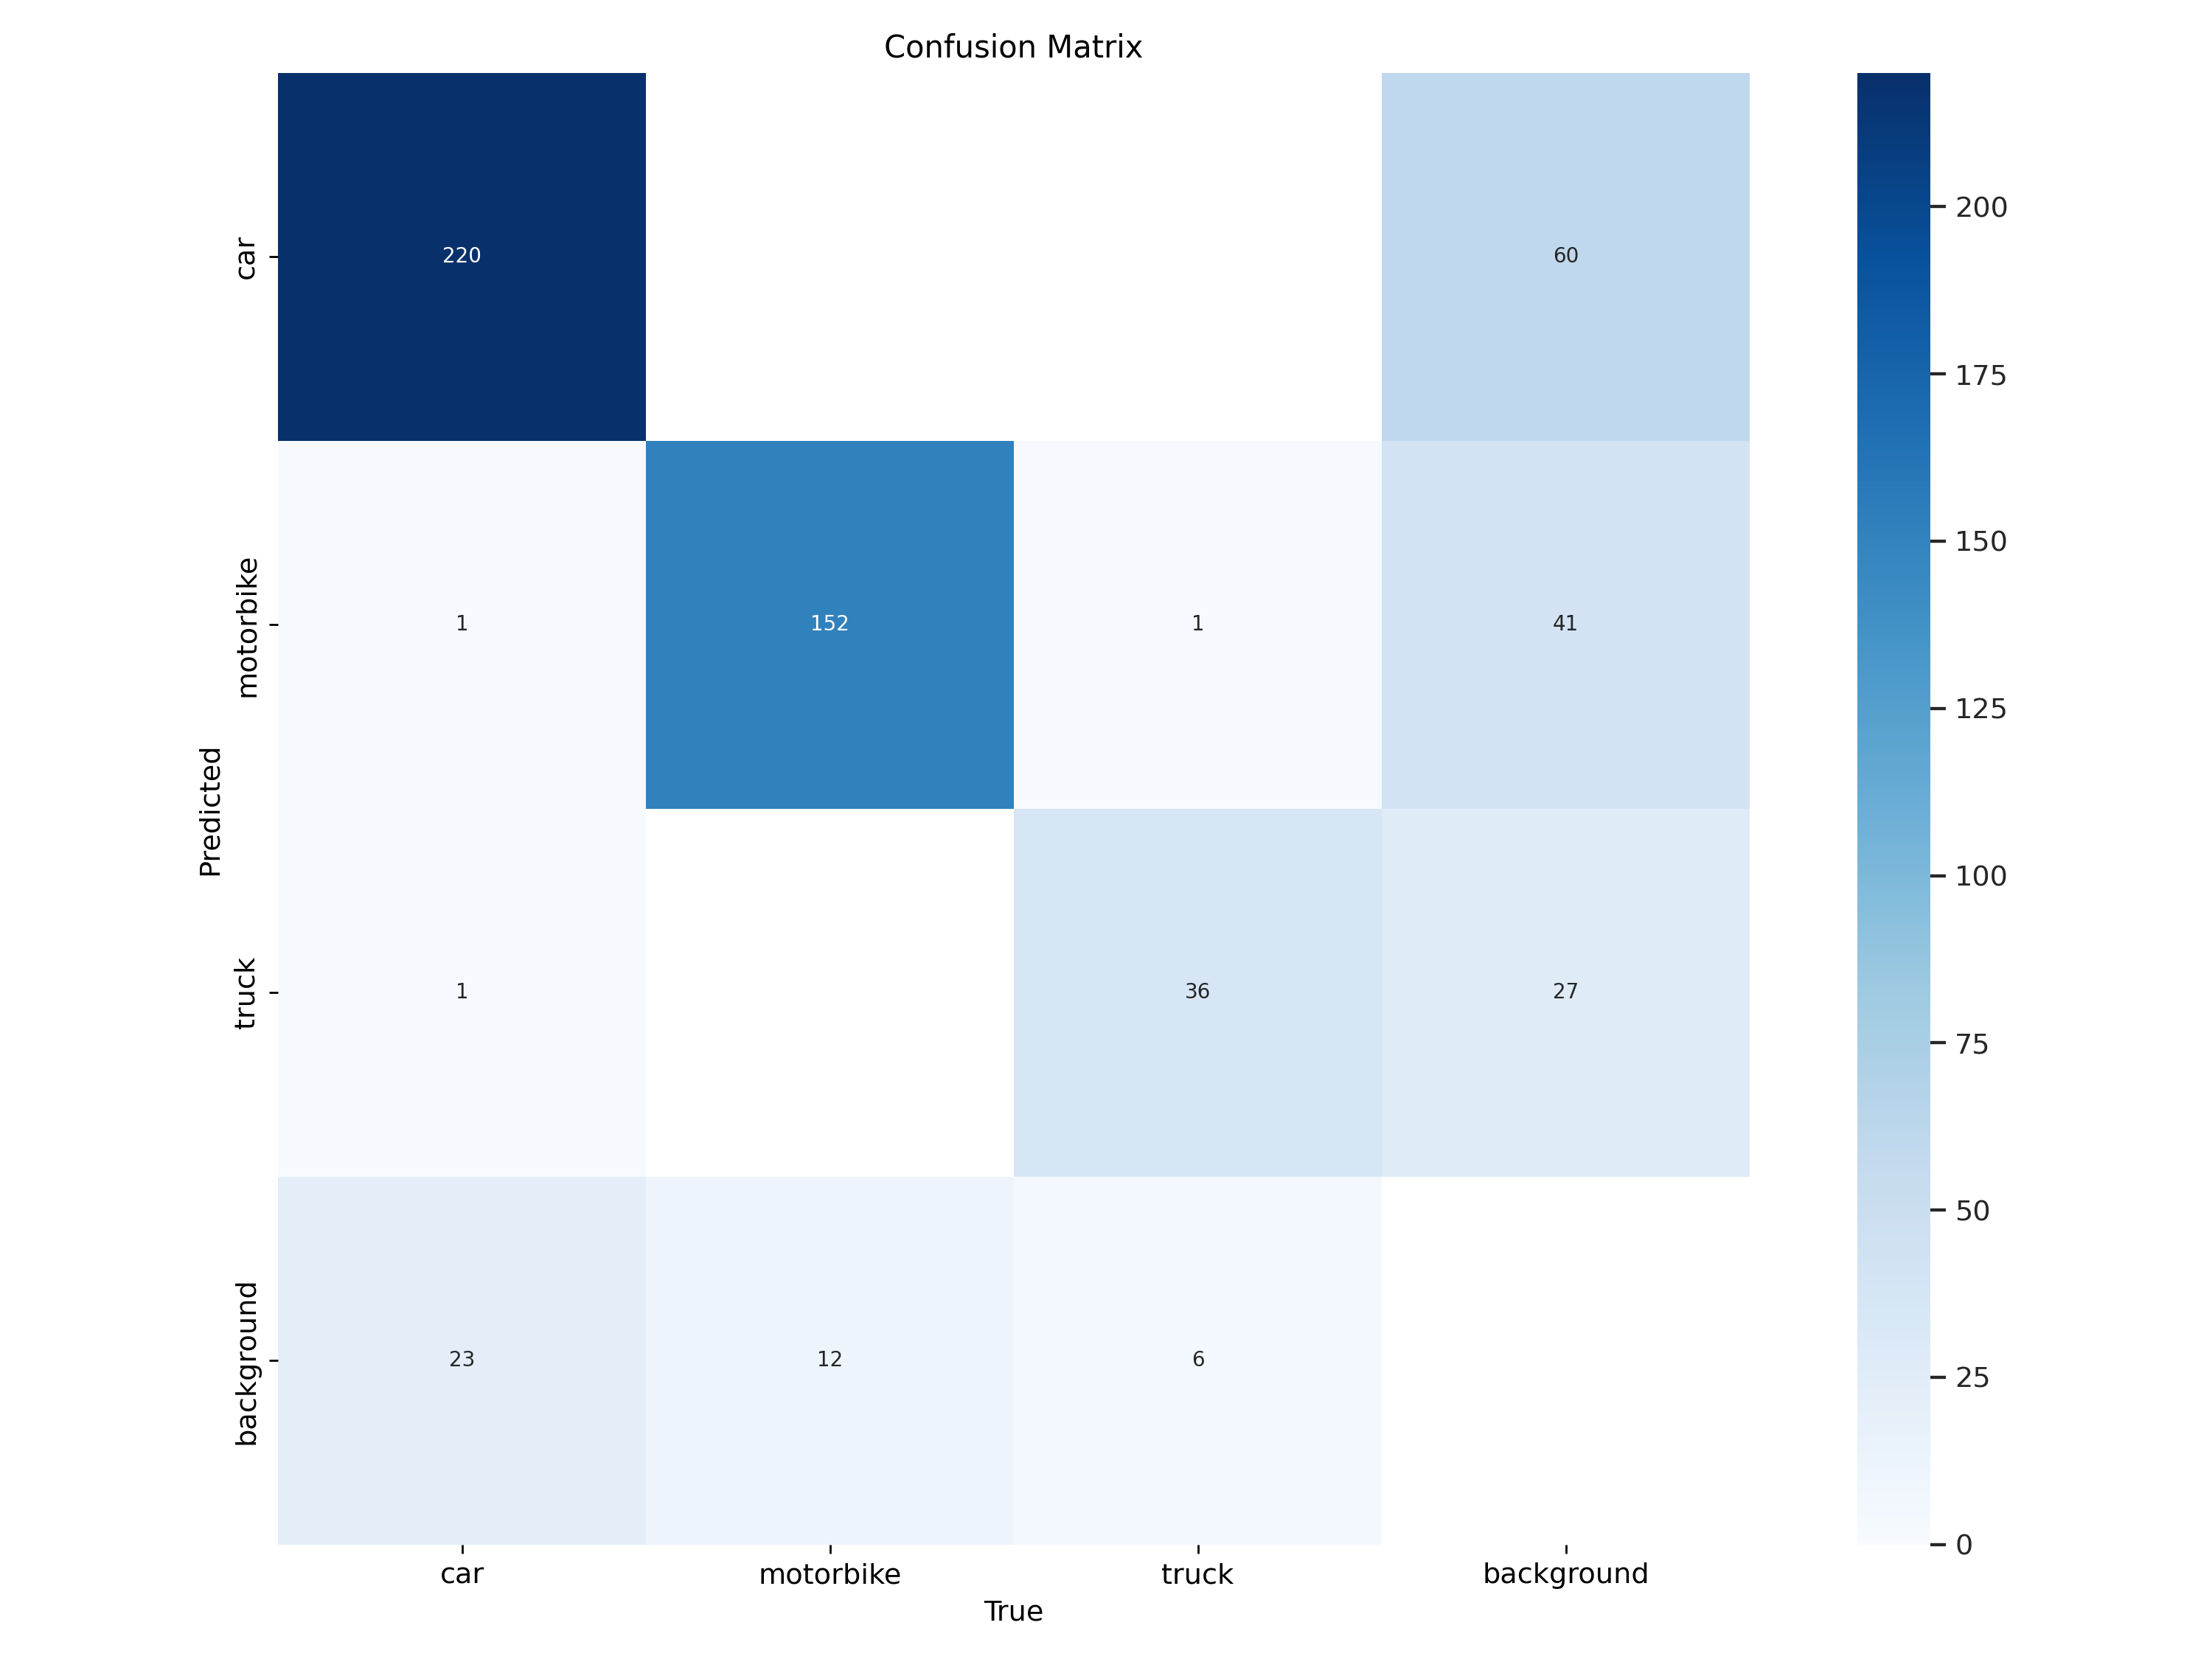

In [17]:
%cd {HOME}
Image(filename=f'runs/detect/train3/confusion_matrix.png', width=600)

[Errno 2] No such file or directory: '{HOME}'
/content


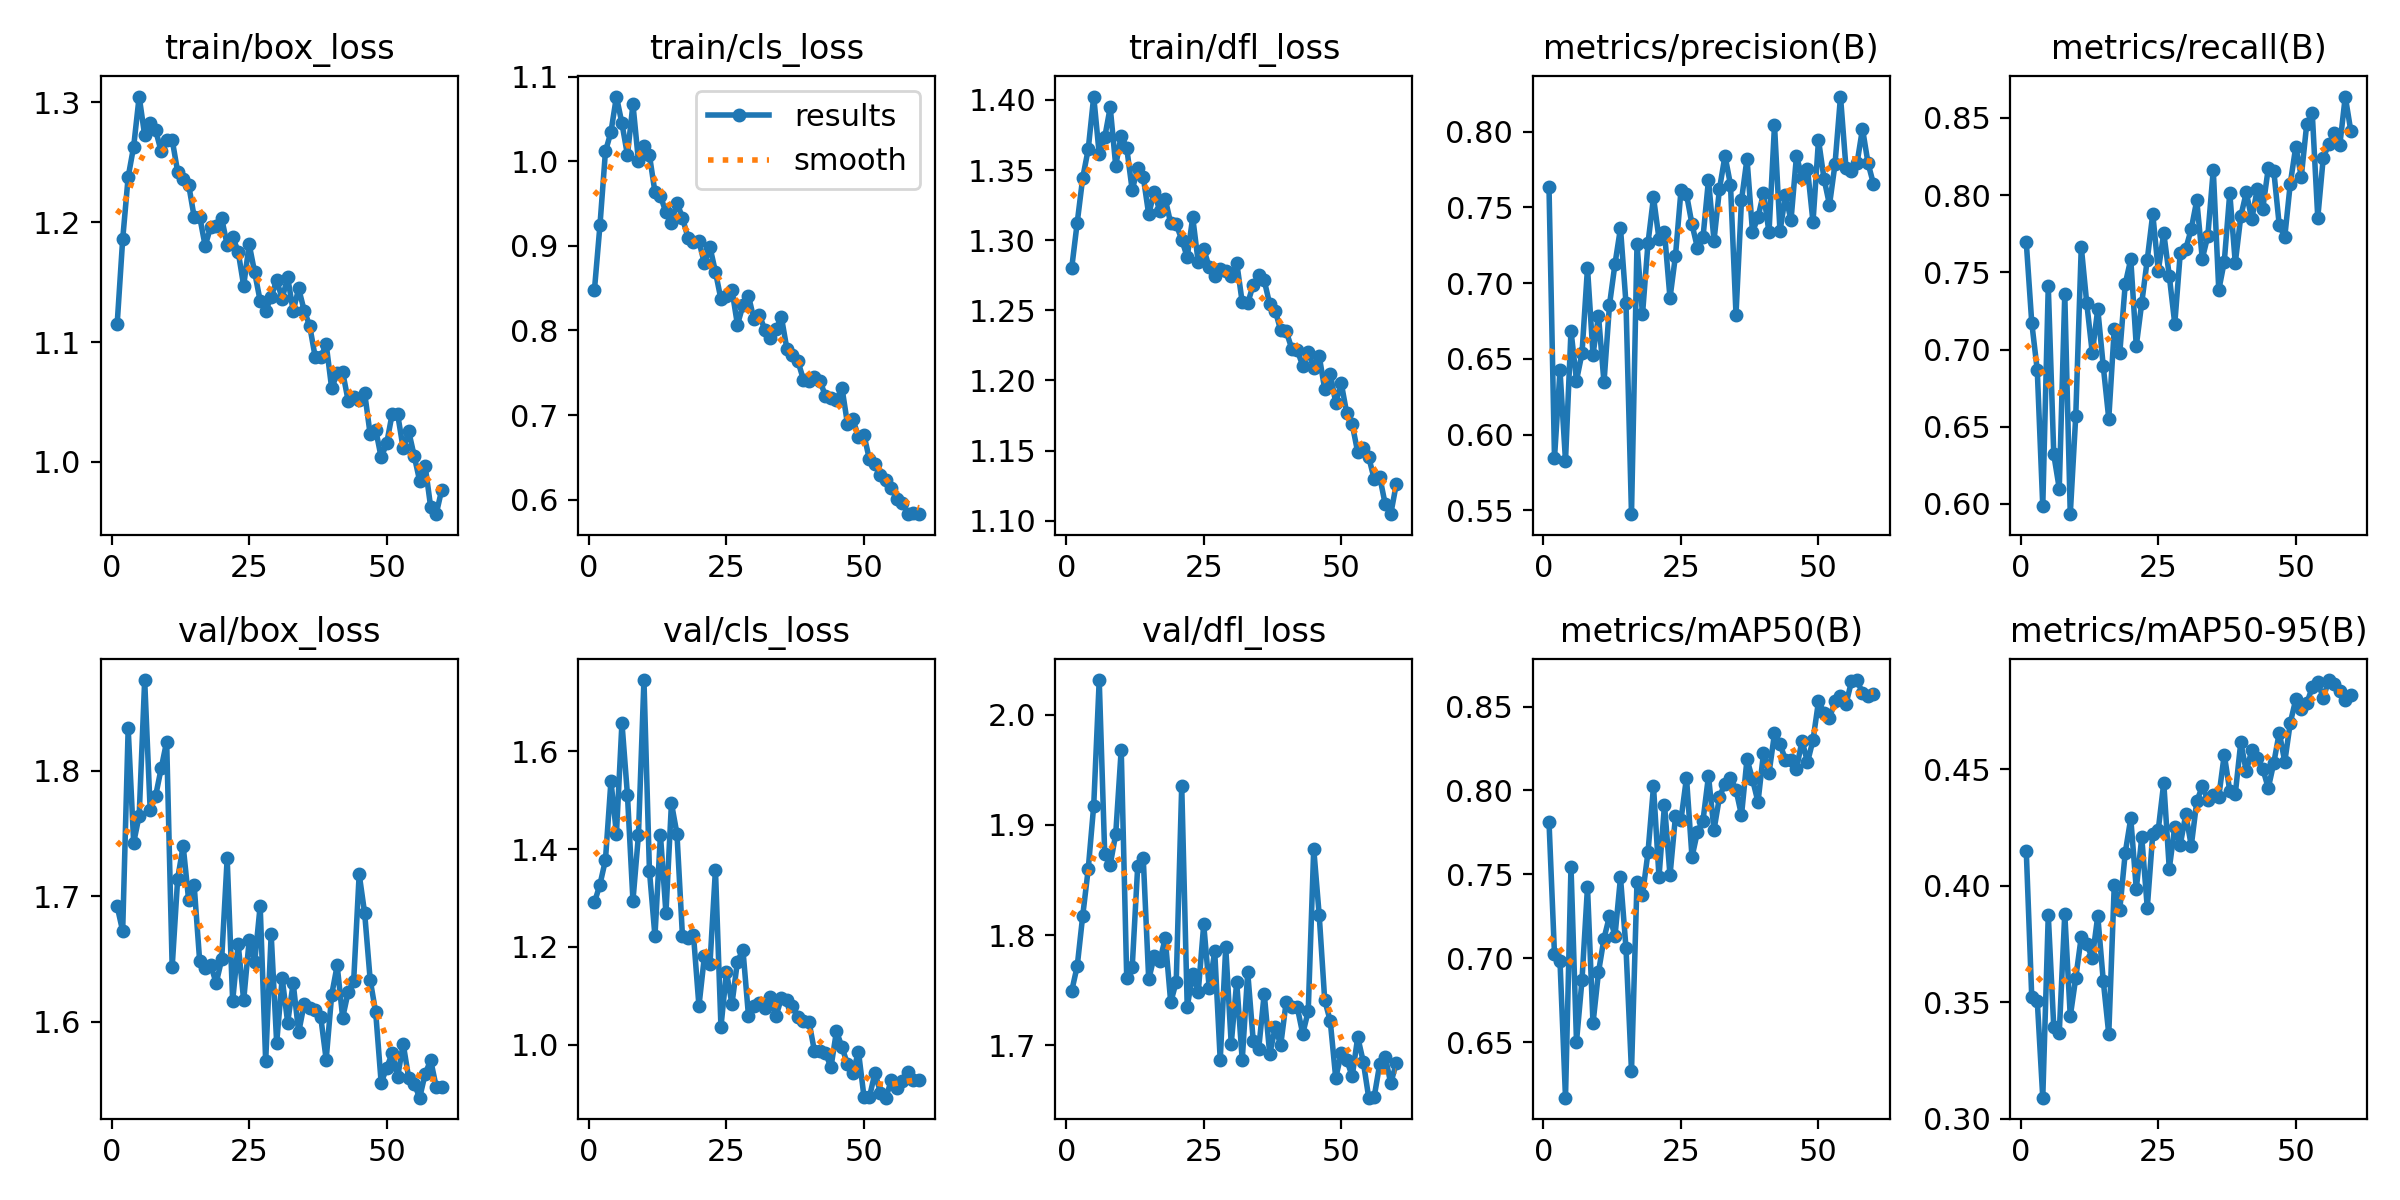

In [18]:
%cd {HOME}
Image(filename=f'runs/detect/train3/results.png', width=600)

[Errno 2] No such file or directory: '{HOME}'
/content


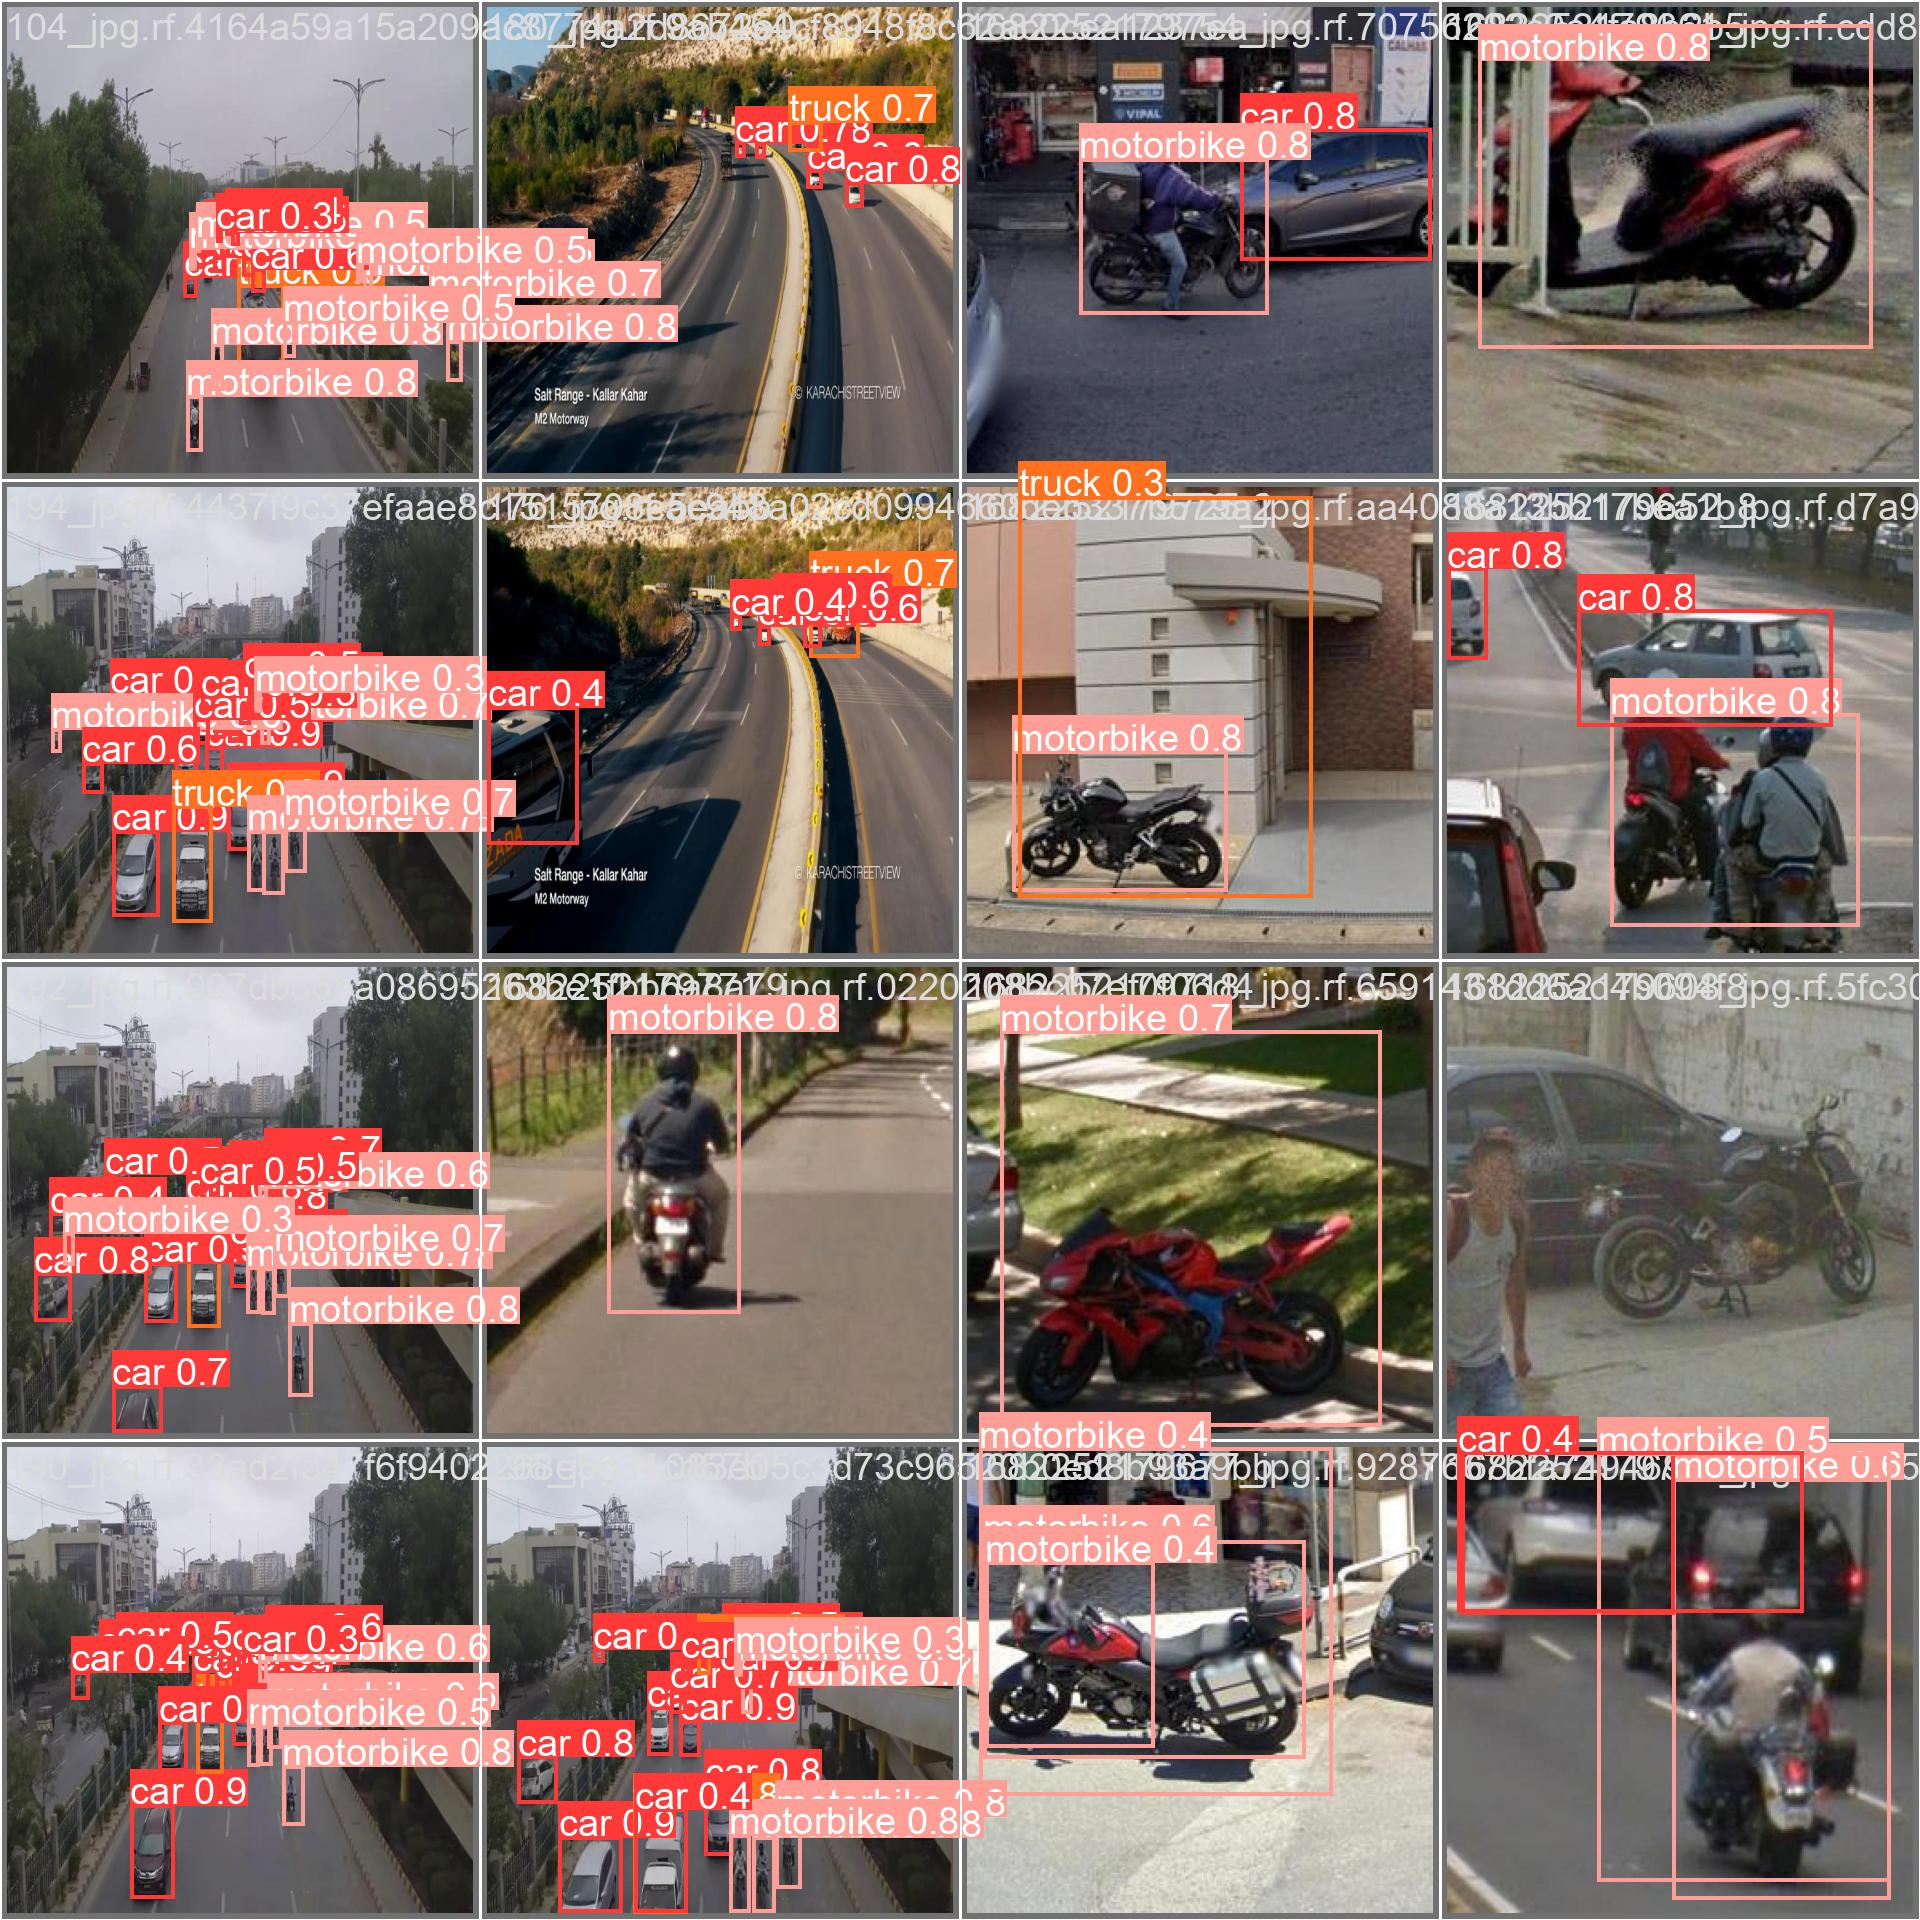

In [20]:
%cd {HOME}
Image(filename=f'runs/detect/train3/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [22]:
%cd {HOME}

!yolo task=detect mode=val model=runs/detect/train3/weights/best.pt data={dataset.location}/data.yaml

[Errno 2] No such file or directory: '{HOME}'
/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/transport-8/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100% 73/73 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 5/5 [00:10<00:00,  2.10s/it]
                   all         73        452      0.773      0.833      0.866      0.489
                   car         73        245      0.856      0.865      0.916      0.527
             motorbike         73        164      0.828      0.866      0.907      0.445
                 truck         73         43      0.635      0.769      0.774      0.496
Speed: 22.0ms preprocess, 25.9ms inference, 0.0ms loss, 20.1ms postprocess per image
Results saved to runs/detect/val2
💡 Learn more at https://docs.ultralytics.com/modes/val


## Inference with Custom Model

In [24]:
%cd {HOME}
!yolo task=detect mode=predict model=runs/detect/train3/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

[Errno 2] No such file or directory: '{HOME}'
/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/98 /content/transport-8/test/images/077006000_1466184933-kepala_kuning_jpg.rf.48cba5b00fec070f8fa4278d5377a7d3.jpg: 1024x1024 1 car, 1 motorbike, 1 truck, 17.5ms
image 2/98 /content/transport-8/test/images/0ed5b30d578ecfa7a65f-1296x954_jpg.rf.30ab1ba9bba8e3962b61b2ee7a94f2c7.jpg: 1024x1024 1 truck, 13.4ms
image 3/98 /content/transport-8/test/images/106_jpg.rf.c591817fa6f72793862ecffbf2fa3b7f.jpg: 1024x1024 2 cars, 3 trucks, 16.8ms
image 4/98 /content/transport-8/test/images/17828_5789AHS01_17-1_jpg.rf.624134cb1d9bc251bc0753cc3824f01c.jpg: 1024x1024 2 trucks, 13.3ms
image 5/98 /content/transport-8/test/images/1997-mitsubishi-fuso-fh211-20-ft-box_jpg.rf.f40587c838ab927f90d76bf54efefc8c.jpg: 1024x1024 1 truck, 13.3ms
ima

**NOTE:** Let's take a look at few results.

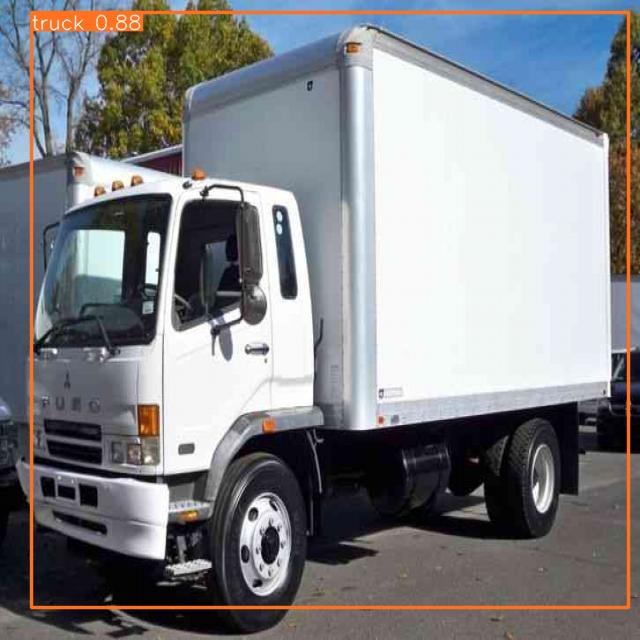

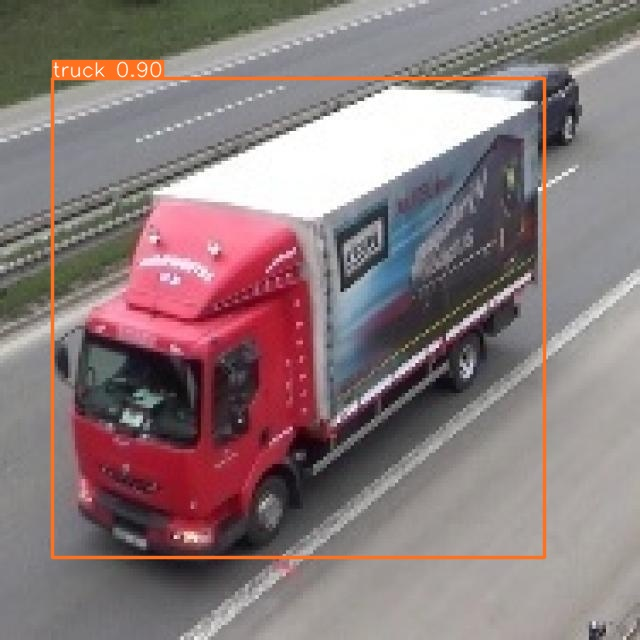

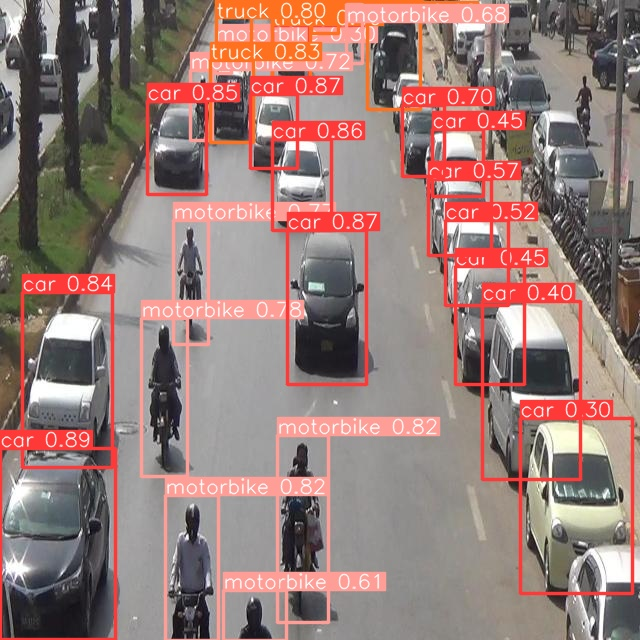

In [25]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'runs/detect/predict3/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [27]:
!yolo predict \
model='runs/detect/train/weights/best.pt' \
source='videot.mp4' \
name='yolov8m_predict_videos1' \
exist_ok=True \
save=True

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs

video 1/1 (1/1654) /content/videot.mp4: 928x1024 37 cars, 2 motorbikes, 92.3ms
video 1/1 (2/1654) /content/videot.mp4: 928x1024 37 cars, 2 motorbikes, 12.2ms
video 1/1 (3/1654) /content/videot.mp4: 928x1024 37 cars, 4 motorbikes, 12.1ms
video 1/1 (4/1654) /content/videot.mp4: 928x1024 37 cars, 4 motorbikes, 12.1ms
video 1/1 (5/1654) /content/videot.mp4: 928x1024 37 cars, 7 motorbikes, 1 truck, 12.1ms
video 1/1 (6/1654) /content/videot.mp4: 928x1024 37 cars, 5 motorbikes, 1 truck, 12.2ms
video 1/1 (7/1654) /content/videot.mp4: 928x1024 37 cars, 5 motorbikes, 12.1ms
video 1/1 (8/1654) /content/videot.mp4: 928x1024 38 cars, 5 motorbikes, 1 truck, 12.1ms
video 1/1 (9/1654) /content/videot.mp4: 928x1024 39 cars, 5 motorbikes, 12.1ms
video 1/1 (10/1654) /content/videot.mp4: 928x1024 39 cars, 5 motorbikes, 12.2ms
video 1/1 (11/

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Deploy model on Roboflow

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv8 weights.

To upload model weights, add the following code to the “Inference with Custom Model” section in the aforementioned notebook:

In [28]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

NameError: name 'HOME' is not defined

In [ ]:
#While your deployment is processing, checkout the deployment docs to take your model to most destinations https://docs.roboflow.com/inference

In [ ]:
#Run inference on your model on a persistant, auto-scaling, cloud API

#load model
model = project.version(dataset.version).model

#choose random test set image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred

# Deploy Your Model to the Edge

In addition to using the Roboflow hosted API for deployment, you can use [Roboflow Inference](https://inference.roboflow.com), an open source inference solution that has powered millions of API calls in production environments. Inference works with CPU and GPU, giving you immediate access to a range of devices, from the NVIDIA Jetson to TRT-compatible devices to ARM CPU devices.

With Roboflow Inference, you can self-host and deploy your model on-device. You can deploy applications using the [Inference Docker containers](https://inference.roboflow.com/quickstart/docker/) or the pip package.

For example, to install Inference on a device with an NVIDIA GPU, we can use:

```
docker pull roboflow/roboflow-inference-server-gpu
```

Then we can run inference via HTTP:

```python
import requests

workspace_id = ""
model_id = ""
image_url = ""
confidence = 0.75
api_key = ""

infer_payload = {
    "image": {
        "type": "url",
        "value": image_url,
    },
    "confidence": confidence,
    "iou_threshold": iou_thresh,
    "api_key": api_key,
}
res = requests.post(
    f"http://localhost:9001/{workspace_id}/{model_id}",
    json=infer_object_detection_payload,
)

predictions = res.json()
```

Above, set your Roboflow workspace ID, model ID, and API key.

- [Find your workspace and model ID](https://docs.roboflow.com/api-reference/workspace-and-project-ids?ref=blog.roboflow.com)
- [Find your API key](https://docs.roboflow.com/api-reference/authentication?ref=blog.roboflow.com#retrieve-an-api-key)

Also, set the URL of an image on which you want to run inference. This can be a local file.

_To use your YOLOv5 model commercially with Inference, you will need a Roboflow Enterprise license, through which you gain a pass-through license for using YOLOv5. An enterprise license also grants you access to features like advanced device management, multi-model containers, auto-batch inference, and more._

## 🏆 Congratulations

### Learning Resources

Roboflow has produced many resources that you may find interesting as you advance your knowledge of computer vision:

- [Roboflow Notebooks](https://github.com/roboflow/notebooks): A repository of over 20 notebooks that walk through how to train custom models with a range of model types, from YOLOv7 to SegFormer.
- [Roboflow YouTube](https://www.youtube.com/c/Roboflow): Our library of videos featuring deep dives into the latest in computer vision, detailed tutorials that accompany our notebooks, and more.
- [Roboflow Discuss](https://discuss.roboflow.com/): Have a question about how to do something on Roboflow? Ask your question on our discussion forum.
- [Roboflow Models](https://roboflow.com): Learn about state-of-the-art models and their performance. Find links and tutorials to guide your learning.

### Convert data formats

Roboflow provides free utilities to convert data between dozens of popular computer vision formats. Check out [Roboflow Formats](https://roboflow.com/formats) to find tutorials on how to convert data between formats in a few clicks.

### Connect computer vision to your project logic

[Roboflow Templates](https://roboflow.com/templates) is a public gallery of code snippets that you can use to connect computer vision to your project logic. Code snippets range from sending emails after inference to measuring object distance between detections.